In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import random

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12

## Simulating Kafka Messages and Consumer Groups

Let's create a simulation that shows how messages flow to different consumer groups.

In [2]:
# Simulate messages produced to a Kafka topic
class Message:
    def __init__(self, offset, content):
        self.offset = offset
        self.content = content
        self.timestamp = datetime.now() + timedelta(seconds=offset)

class ConsumerGroup:
    def __init__(self, group_id, name):
        self.group_id = group_id
        self.name = name
        self.received_messages = []
        self.acknowledged_offsets = set()
    
    def receive(self, message):
        self.received_messages.append(message)
    
    def acknowledge(self, offset):
        self.acknowledged_offsets.add(offset)
    
    def get_status(self):
        return {
            'group_id': self.group_id,
            'received': len(self.received_messages),
            'acknowledged': len(self.acknowledged_offsets)
        }

# Create messages
messages = [Message(i, f"Order-{i:03d}") for i in range(10)]

# Create two consumers with DIFFERENT group IDs
consumer_a = ConsumerGroup("group-A", "Notification Service")
consumer_b = ConsumerGroup("group-B", "Analytics Service")

print(f"Created {len(messages)} messages")
print(f"Consumer A: group_id = '{consumer_a.group_id}'")
print(f"Consumer B: group_id = '{consumer_b.group_id}'")

Created 10 messages
Consumer A: group_id = 'group-A'
Consumer B: group_id = 'group-B'


## Both Consumers Receive ALL Messages

Because they have **different group IDs**, each consumer receives a copy of every message.

In [3]:
# Simulate both consumers receiving ALL messages (different group IDs)
for msg in messages:
    consumer_a.receive(msg)
    consumer_b.receive(msg)

print("Messages received:")
print(f"  Consumer A (group-A): {len(consumer_a.received_messages)} messages")
print(f"  Consumer B (group-B): {len(consumer_b.received_messages)} messages")
print(f"\n✅ Both consumers received ALL {len(messages)} messages!")

Messages received:
  Consumer A (group-A): 10 messages
  Consumer B (group-B): 10 messages

✅ Both consumers received ALL 10 messages!


## Visualizing Message Distribution

Let's create a visual representation showing that both consumers receive all messages.

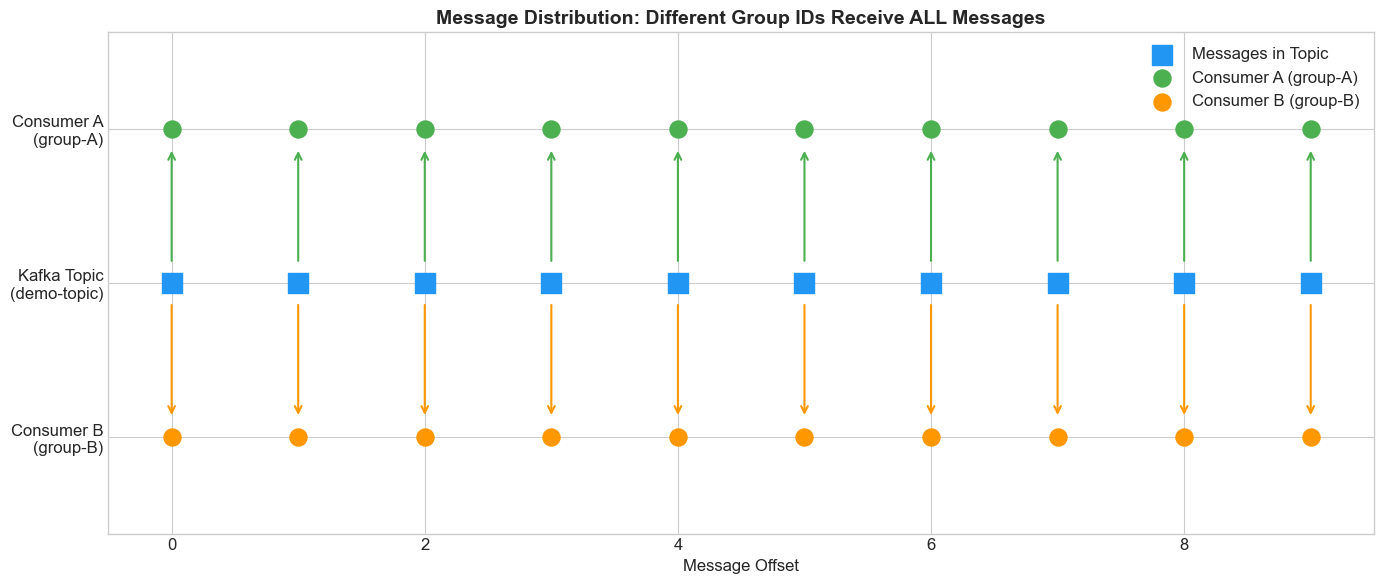


📊 Each message flows to BOTH consumers because they have different group IDs!


In [4]:
fig, ax = plt.subplots(figsize=(14, 6))

# Plot messages as a timeline
offsets = [msg.offset for msg in messages]

# Kafka topic (center)
ax.scatter(offsets, [1]*len(offsets), s=200, c='#2196F3', marker='s', 
           label='Messages in Topic', zorder=3)

# Consumer A receives (top)
ax.scatter(offsets, [1.8]*len(offsets), s=150, c='#4CAF50', marker='o', 
           label='Consumer A (group-A)', zorder=3)

# Consumer B receives (bottom)
ax.scatter(offsets, [0.2]*len(offsets), s=150, c='#FF9800', marker='o', 
           label='Consumer B (group-B)', zorder=3)

# Draw arrows from topic to consumers
for offset in offsets:
    ax.annotate('', xy=(offset, 1.7), xytext=(offset, 1.1),
                arrowprops=dict(arrowstyle='->', color='#4CAF50', lw=1.5))
    ax.annotate('', xy=(offset, 0.3), xytext=(offset, 0.9),
                arrowprops=dict(arrowstyle='->', color='#FF9800', lw=1.5))

# Labels
ax.set_yticks([0.2, 1, 1.8])
ax.set_yticklabels(['Consumer B\n(group-B)', 'Kafka Topic\n(demo-topic)', 'Consumer A\n(group-A)'])
ax.set_xlabel('Message Offset')
ax.set_title('Message Distribution: Different Group IDs Receive ALL Messages', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.set_xlim(-0.5, len(messages) - 0.5)
ax.set_ylim(-0.3, 2.3)

plt.tight_layout()
plt.show()

print("\n📊 Each message flows to BOTH consumers because they have different group IDs!")

## Independent Acknowledgment - The Key Proof!

Now let's demonstrate the **critical behavior**: 
- Consumer A acknowledges some messages
- Consumer B acknowledges different messages
- **Each consumer's acknowledgment is completely independent!**

In [5]:
# Consumer A acknowledges messages 0, 1, 2, 3, 4 (first 5)
for offset in range(5):
    consumer_a.acknowledge(offset)

# Consumer B acknowledges messages 0, 1, 2 (first 3)
for offset in range(3):
    consumer_b.acknowledge(offset)

print("Acknowledgment Status:")
print(f"  Consumer A: Acknowledged {len(consumer_a.acknowledged_offsets)} messages (offsets: {sorted(consumer_a.acknowledged_offsets)})")
print(f"  Consumer B: Acknowledged {len(consumer_b.acknowledged_offsets)} messages (offsets: {sorted(consumer_b.acknowledged_offsets)})")
print(f"\n✅ Total acknowledgments: {len(consumer_a.acknowledged_offsets) + len(consumer_b.acknowledged_offsets)}")
print(f"✅ Messages 0, 1, 2 were acknowledged TWICE (once by each group)!")

Acknowledgment Status:
  Consumer A: Acknowledged 5 messages (offsets: [0, 1, 2, 3, 4])
  Consumer B: Acknowledged 3 messages (offsets: [0, 1, 2])

✅ Total acknowledgments: 8
✅ Messages 0, 1, 2 were acknowledged TWICE (once by each group)!


## Visualizing Independent Acknowledgments

/var/folders/nn/4459bvg541j38p1n83wq2qm40000gn/T/ipykernel_11563/3668504075.py:55: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/nn/4459bvg541j38p1n83wq2qm40000gn/T/ipykernel_11563/3668504075.py:55: UserWarning: Glyph 10007 (\N{BALLOT X}) missing from font(s) Arial.
  plt.tight_layout()
/opt/homebrew/Caskroom/miniconda/base/envs/kafka-consumer-groups/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/envs/kafka-consumer-groups/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10007 (\N{BALLOT X}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


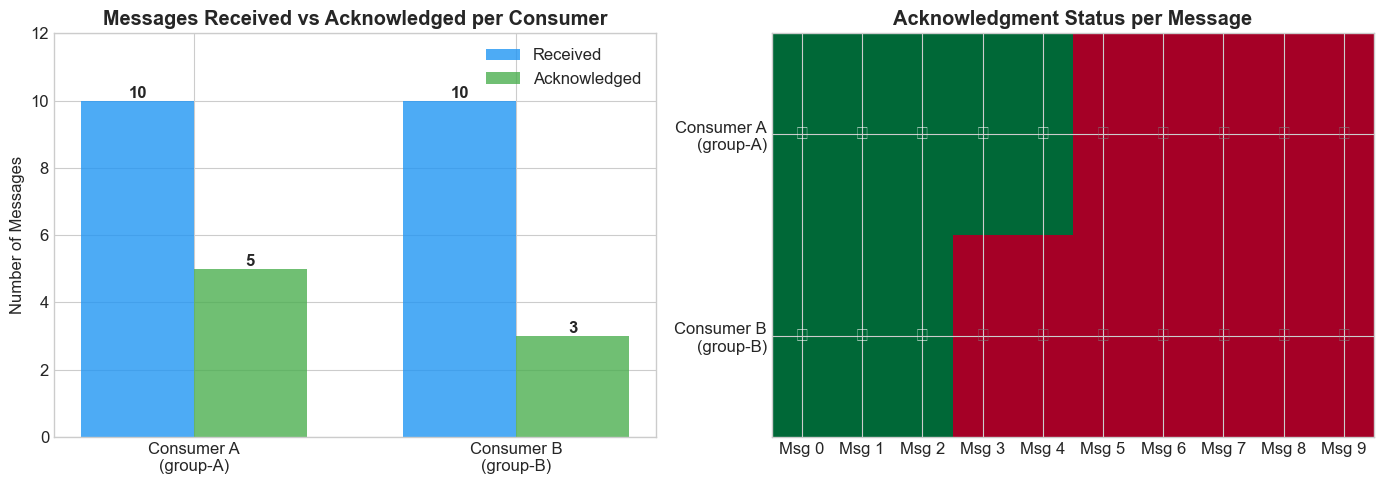

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Acknowledgment status per consumer
ax1 = axes[0]

consumer_names = ['Consumer A\n(group-A)', 'Consumer B\n(group-B)']
received = [len(consumer_a.received_messages), len(consumer_b.received_messages)]
acknowledged = [len(consumer_a.acknowledged_offsets), len(consumer_b.acknowledged_offsets)]

x = np.arange(len(consumer_names))
width = 0.35

bars1 = ax1.bar(x - width/2, received, width, label='Received', color='#2196F3', alpha=0.8)
bars2 = ax1.bar(x + width/2, acknowledged, width, label='Acknowledged', color='#4CAF50', alpha=0.8)

ax1.set_ylabel('Number of Messages')
ax1.set_title('Messages Received vs Acknowledged per Consumer', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(consumer_names)
ax1.legend()
ax1.set_ylim(0, 12)

# Add value labels on bars
for bar in bars1:
    ax1.annotate(f'{bar.get_height():.0f}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 ha='center', va='bottom', fontweight='bold')
for bar in bars2:
    ax1.annotate(f'{bar.get_height():.0f}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 ha='center', va='bottom', fontweight='bold')

# Right plot: Acknowledgment timeline
ax2 = axes[1]

all_offsets = list(range(10))
ack_a = [1 if o in consumer_a.acknowledged_offsets else 0 for o in all_offsets]
ack_b = [1 if o in consumer_b.acknowledged_offsets else 0 for o in all_offsets]

# Create heatmap-style visualization
data = np.array([ack_a, ack_b])
im = ax2.imshow(data, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)

ax2.set_yticks([0, 1])
ax2.set_yticklabels(['Consumer A\n(group-A)', 'Consumer B\n(group-B)'])
ax2.set_xticks(range(10))
ax2.set_xticklabels([f'Msg {i}' for i in range(10)])
ax2.set_title('Acknowledgment Status per Message', fontweight='bold')

# Add text annotations
for i in range(2):
    for j in range(10):
        text = '✓' if data[i, j] == 1 else '✗'
        color = 'white' if data[i, j] == 1 else 'gray'
        ax2.text(j, i, text, ha='center', va='center', color=color, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## The Proof: Same Message Acknowledged by Multiple Groups

In [7]:
# Find messages acknowledged by both consumers
both_acknowledged = consumer_a.acknowledged_offsets.intersection(consumer_b.acknowledged_offsets)
only_a = consumer_a.acknowledged_offsets - consumer_b.acknowledged_offsets
only_b = consumer_b.acknowledged_offsets - consumer_a.acknowledged_offsets

print("="*60)
print("📊 PROOF: INDEPENDENT ACKNOWLEDGMENT")
print("="*60)
print(f"\n✅ Messages acknowledged by BOTH groups: {sorted(both_acknowledged)}")
print(f"   → These messages were acknowledged TWICE!")
print(f"\n🅰️  Only Consumer A acknowledged: {sorted(only_a)}")
print(f"🅱️  Only Consumer B acknowledged: {sorted(only_b)}")
print(f"\n" + "="*60)
print("CONCLUSION:")
print("  Different group IDs = Independent offset tracking")
print("  One consumer's ACK does NOT affect the other!")
print("="*60)

📊 PROOF: INDEPENDENT ACKNOWLEDGMENT

✅ Messages acknowledged by BOTH groups: [0, 1, 2]
   → These messages were acknowledged TWICE!

🅰️  Only Consumer A acknowledged: [3, 4]
🅱️  Only Consumer B acknowledged: []

CONCLUSION:
  Different group IDs = Independent offset tracking
  One consumer's ACK does NOT affect the other!


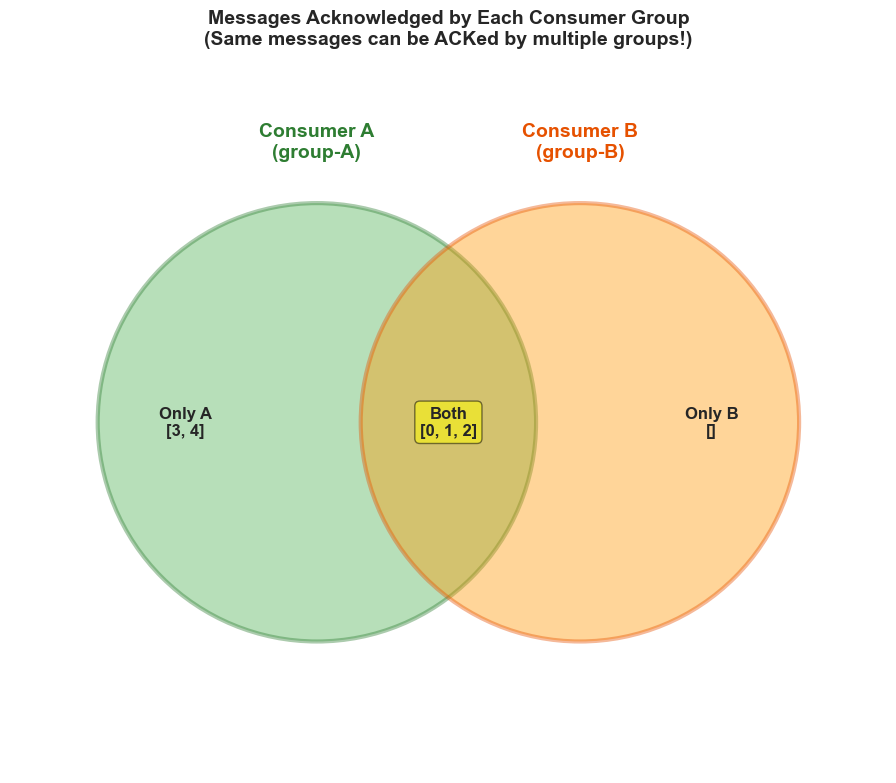


🎯 Messages [0, 1, 2] were acknowledged by BOTH consumer groups!
   This proves that different group IDs maintain independent offset tracking.


In [8]:
# Venn diagram style visualization
fig, ax = plt.subplots(figsize=(10, 8))

# Create circles
from matplotlib.patches import Circle, FancyBboxPatch

# Consumer A circle (left)
circle_a = Circle((0.35, 0.5), 0.25, fill=True, facecolor='#4CAF50', alpha=0.4, 
                   edgecolor='#2E7D32', linewidth=3)
ax.add_patch(circle_a)

# Consumer B circle (right)
circle_b = Circle((0.65, 0.5), 0.25, fill=True, facecolor='#FF9800', alpha=0.4,
                   edgecolor='#E65100', linewidth=3)
ax.add_patch(circle_b)

# Labels
ax.text(0.2, 0.5, f"Only A\n{sorted(only_a)}", ha='center', va='center', fontsize=12, fontweight='bold')
ax.text(0.5, 0.5, f"Both\n{sorted(both_acknowledged)}", ha='center', va='center', fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
ax.text(0.8, 0.5, f"Only B\n{sorted(only_b)}", ha='center', va='center', fontsize=12, fontweight='bold')

# Title and labels
ax.text(0.35, 0.82, 'Consumer A\n(group-A)', ha='center', va='center', fontsize=14, fontweight='bold', color='#2E7D32')
ax.text(0.65, 0.82, 'Consumer B\n(group-B)', ha='center', va='center', fontsize=14, fontweight='bold', color='#E65100')

ax.set_xlim(0, 1)
ax.set_ylim(0.1, 0.9)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Messages Acknowledged by Each Consumer Group\n(Same messages can be ACKed by multiple groups!)', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print(f"\n🎯 Messages {sorted(both_acknowledged)} were acknowledged by BOTH consumer groups!")
print(f"   This proves that different group IDs maintain independent offset tracking.")

## Summary: Why This Matters

### Real-World Use Case

Imagine an e-commerce system where order events need to be processed by multiple services:

| Service | Group ID | Purpose |
|---------|----------|--------|
| Notification Service | `notifications` | Send order confirmation emails |
| Analytics Service | `analytics` | Track sales metrics |
| Inventory Service | `inventory` | Update stock levels |

Each service:
1. Receives **ALL** order events
2. Processes at its **own pace**
3. Tracks its **own offset** (progress)
4. Can **crash and recover** without affecting others

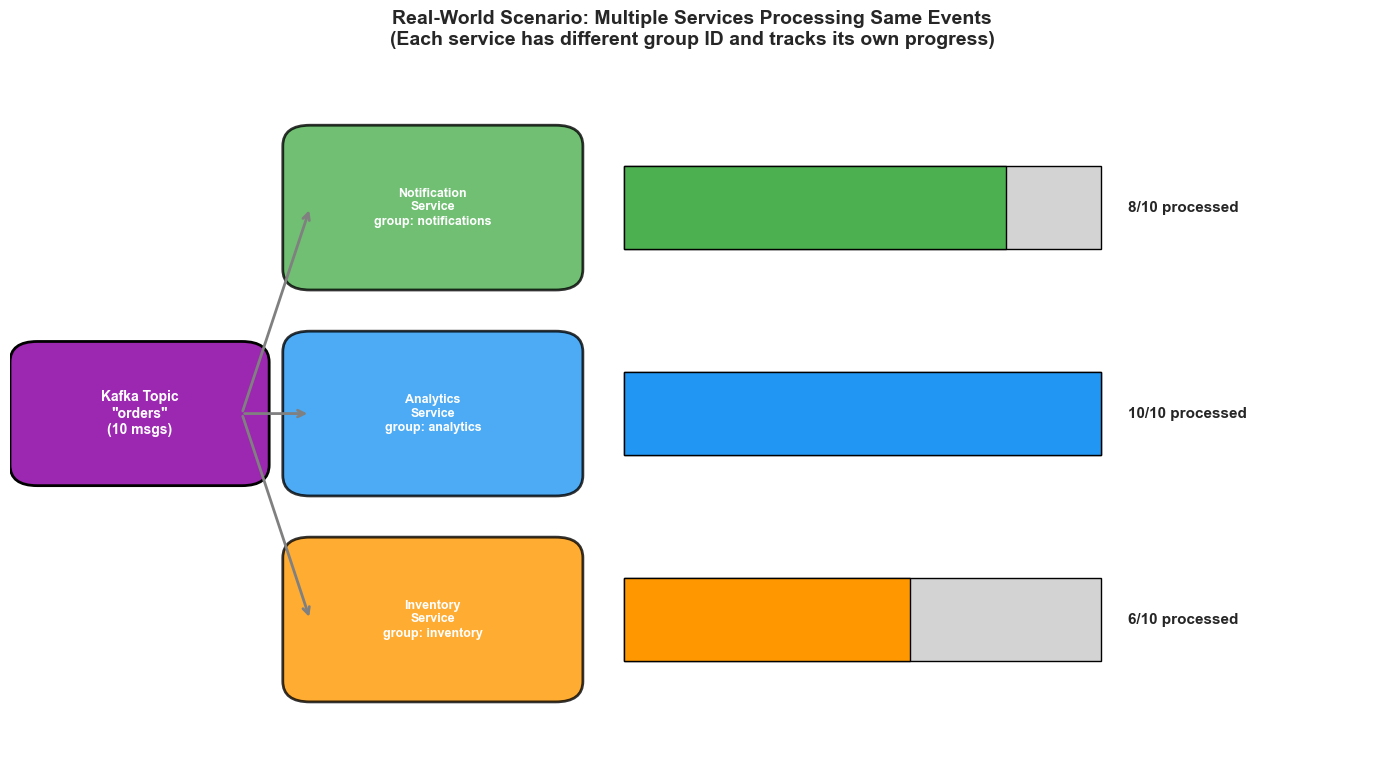


KEY TAKEAWAY:
  • Each service processes the SAME 10 messages
  • Each service tracks its OWN progress (offset)
  • If Analytics crashes at message 10, Notification is unaffected
  • This is the power of Kafka consumer groups!


In [9]:
# Final visualization: Real-world scenario
fig, ax = plt.subplots(figsize=(14, 8))

# Simulate different processing speeds
services = {
    'Notification\nService': {'group': 'notifications', 'processed': 8, 'color': '#4CAF50'},
    'Analytics\nService': {'group': 'analytics', 'processed': 10, 'color': '#2196F3'},
    'Inventory\nService': {'group': 'inventory', 'processed': 6, 'color': '#FF9800'},
}

y_positions = [0.7, 0.5, 0.3]
total_messages = 10

# Draw Kafka topic
topic_box = FancyBboxPatch((0.02, 0.45), 0.15, 0.1, boxstyle="round,pad=0.02",
                            facecolor='#9C27B0', edgecolor='black', linewidth=2)
ax.add_patch(topic_box)
ax.text(0.095, 0.5, 'Kafka Topic\n"orders"\n(10 msgs)', ha='center', va='center', 
        fontsize=10, fontweight='bold', color='white')

# Draw each service and its progress
for idx, (service_name, info) in enumerate(services.items()):
    y = y_positions[idx]
    
    # Arrow from topic
    ax.annotate('', xy=(0.22, y), xytext=(0.17, 0.5),
                arrowprops=dict(arrowstyle='->', color='gray', lw=2))
    
    # Service box
    service_box = FancyBboxPatch((0.22, y-0.06), 0.18, 0.12, boxstyle="round,pad=0.02",
                                  facecolor=info['color'], edgecolor='black', linewidth=2, alpha=0.8)
    ax.add_patch(service_box)
    ax.text(0.31, y, f"{service_name}\ngroup: {info['group']}", ha='center', va='center',
            fontsize=9, fontweight='bold', color='white')
    
    # Progress bar
    bar_width = 0.35
    progress = info['processed'] / total_messages
    
    # Background bar
    ax.barh(y, bar_width, left=0.45, height=0.08, color='lightgray', edgecolor='black')
    # Progress bar
    ax.barh(y, bar_width * progress, left=0.45, height=0.08, color=info['color'], edgecolor='black')
    
    # Progress text
    ax.text(0.82, y, f"{info['processed']}/{total_messages} processed", va='center', fontsize=11, fontweight='bold')

ax.set_xlim(0, 1)
ax.set_ylim(0.15, 0.85)
ax.axis('off')
ax.set_title('Real-World Scenario: Multiple Services Processing Same Events\n'
             '(Each service has different group ID and tracks its own progress)', 
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("KEY TAKEAWAY:")
print("  • Each service processes the SAME 10 messages")
print("  • Each service tracks its OWN progress (offset)")
print("  • If Analytics crashes at message 10, Notification is unaffected")
print("  • This is the power of Kafka consumer groups!")
print("="*70)